In [197]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator
from sklearn.preprocessing import MinMaxScaler

# импортируем функции
from functions import generate_random_array, plot_true_vs_predicted,  Functions


In [198]:
# Исходные данные
# создаем объект класса Functions 
main_function = Functions()


# определяем количетсво строк для обучения
main_function.n_samples = 1000

# пределы варьирования признаков
main_function.limits = (-10, 10)

# определяем вид функции
main_function.set_function(main_function.trigonometric)


In [199]:
# масштабируем матрицу признаков
scaler = MinMaxScaler()
main_function.features_scaled = scaler.fit_transform(main_function.features) 

In [200]:
# Создаём интерполятор
# kernel: 'thin_plate_spline', 'gaussian', 'linear', 'cubic', 'quintic', 'multiquadric', 'inverse_multiquadric'
rbf_interp = RBFInterpolator(
    main_function.features_scaled,
    main_function.target,
    kernel='inverse_multiquadric',   # или 'gaussian', 'multiquadric' и т.д.
    degree=1,                     # степень полинома (0 = константа)
    smoothing = 1e-3,             # регуляризация (0 = интерполяция, >0 = аппроксимация)
    epsilon = 1
    )

In [201]:
# генерим еще случайные данные, в этот раз много для более глубокой проверки модели
# генерим случайный массив признаков от -10 до +10
test_features = generate_random_array(1000, main_function.n_features, main_function.limits[0], main_function.limits[1], seed = 1488)
# Подставляем сгенерированный массив в функцию
test_target = main_function.function(*test_features.T)
# масштабируем новые данные
test_features_scaled = scaler.fit_transform(test_features) 

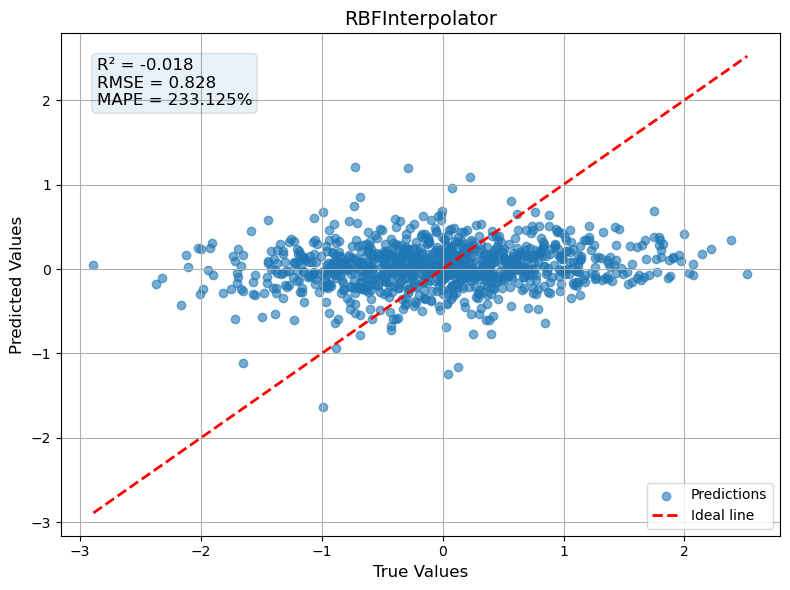

In [202]:
# Расчитываем отклик по данным для проверки
pred_target = rbf_interp(test_features_scaled)
# посмотрим на результат
plot_true_vs_predicted (test_target, pred_target, title= f'RBFInterpolator')